# Decision Tree Regressor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ch6/audi car dataset.csv")

In [ ]:
df.head()

,model,year,transmission,distance,fuelType,tax,mpg,engineSize,europrice
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4,12500
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0,16500
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4,11000
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0,16800
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0,17300


In [ ]:
df['model'].value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

## Encode Categorical Variable

In [ ]:
df = pd.get_dummies(df, ['model', 'transmission', 'fuelType'])

In [ ]:
df.head()

,year,distance,tax,mpg,engineSize,europrice,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,15735,150,55.4,1.4,12500,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,36203,20,64.2,2.0,16500,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,29946,30,55.4,1.4,11000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,25952,145,67.3,2.0,16800,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2019,1998,145,49.6,1.0,17300,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
X = df.drop(['europrice'], axis=1)
y = df['europrice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_model.score(X_test, y_test)

0.8960446237229936

In [ ]:
lin_model.score(X_train, y_train)

0.8902521668369524

In [ ]:
from sklearn.metrics import mean_squared_error
lr_pred = lin_model.predict(X_test)
mean_squared_error(y_test, lr_pred, squared=False)

3963.6755587039756

##DTR

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(max_depth=4, max_leaf_nodes=6)
dtr_model.fit(X_train, y_train)
dtr_model.score(X_test, y_test)

0.7233589333061051

In [ ]:
dtr_model.score(X_train, y_train)

0.6296460560316846

In [ ]:
dtr_pred = dtr_model.predict(X_test)
mean_squared_error(y_test, dtr_pred, squared=False)

6903.50617940631

[Text(0.4230769230769231, 0.9, 'X[3] <= 39.5\nsquared_error = 133720307.769\nsamples = 8534\nvalue = 22822.755'),
 Text(0.15384615384615385, 0.7, 'X[4] <= 2.7\nsquared_error = 226279926.489\nsamples = 1602\nvalue = 37679.27'),
 Text(0.07692307692307693, 0.5, 'squared_error = 51479455.574\nsamples = 945\nvalue = 31499.945'),
 Text(0.23076923076923078, 0.5, 'X[4] <= 4.7\nsquared_error = 343785208.431\nsamples = 657\nvalue = 46567.339'),
 Text(0.15384615384615385, 0.3, 'X[0] <= 2015.5\nsquared_error = 226221636.141\nsamples = 639\nvalue = 45030.097'),
 Text(0.07692307692307693, 0.1, 'squared_error = 158285855.635\nsamples = 85\nvalue = 22764.847'),
 Text(0.23076923076923078, 0.1, 'squared_error = 148913526.254\nsamples = 554\nvalue = 48446.245'),
 Text(0.3076923076923077, 0.3, 'squared_error = 1455286824.691\nsamples = 18\nvalue = 101139.444'),
 Text(0.6923076923076923, 0.7, 'X[0] <= 2017.5\nsquared_error = 49533594.72\nsamples = 6932\nvalue = 19389.383'),
 Text(0.5384615384615384, 0.5, '

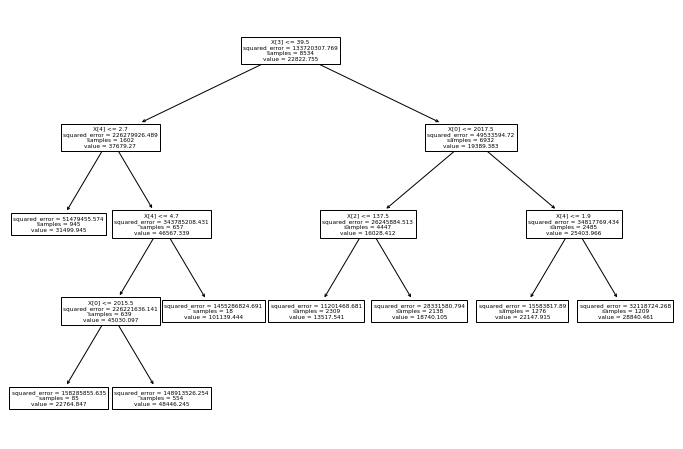

In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dtr_model.fit(X_train, y_train))